In [5]:
import sys
import json
import h5py
import trimesh
from pathlib import Path
import argparse
import numpy as np
import trimesh.path
from shapely.geometry import Point

from acronym_tools import Scene, load_mesh, load_grasps, create_gripper_marker
import easydict

In [18]:
def custom_parser():
    # object는 parser.add_argument( ~ , nargs="+") , nargs="+" 때문에 list로 arg 셋팅함
    args = easydict.EasyDict({
        "objects" : ["/home/juju/acronym/data/examples/grasps/Mug_10f6e09036350e92b3f21f1137c3c347_0.0002682457830986903.h5", "/home/juju/acronym/data/examples/grasps/Mug_10f6e09036350e92b3f21f1137c3c347_0.0002682457830986903.h5", "/home/juju/acronym/data/examples/grasps/Mug_10f6e09036350e92b3f21f1137c3c347_0.0002682457830986903.h5", "/home/juju/acronym/data/examples/grasps/Mug_10f6e09036350e92b3f21f1137c3c347_0.0002682457830986903.h5", "/home/juju/acronym/data/examples/grasps/Mug_10f6e09036350e92b3f21f1137c3c347_0.0002682457830986903.h5"],
        # "support" : "/home/juju/acronym/data/examples/grasps/Table_99cf659ae2fe4b87b72437fd995483b_0.009700376721042367.h5",
        "support" : "/home/juju/acronym/data/grasps/CoffeeTable_9c71de3e26788e20d810b14a81e12eca_0.00638760307597401.h5",
        "num_grasps" : 5,
        "mesh_root" : '/home/juju/acronym/data/examples/',
        "support_scale" : 0.025
    })
    return args

In [19]:
args = custom_parser()

In [21]:
object_meshes = [load_mesh(o, mesh_root_dir=args.mesh_root) for o in args.objects]
support_mesh = load_mesh(
    args.support, mesh_root_dir=args.mesh_root, scale=args.support_scale
)
scene = Scene.random_arrangement(object_meshes, support_mesh)

scene.colorize().as_trimesh_scene().show()

ValueError: string is not a file: /home/juju/acronym/data/examples/meshes/CoffeeTable/9c71de3e26788e20d810b14a81e12eca.obj

In [12]:
polygons = scene._get_support_polygons()
support_polys, support_T,_ = scene._get_support_polygons()

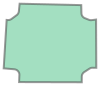

In [14]:
polygons[0][1]

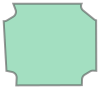

In [16]:
polygons[0][0]

In [19]:
polygons[1][1]
scene._support_objects

{'support_object': <trimesh.Trimesh(vertices.shape=(614, 3), faces.shape=(1236, 3))>}

In [20]:
obj_mesh = scene._support_objects[_]
gravity=np.array([0, 0, -1.0])
min_area=0.01

support_facet_indices = np.argsort(obj_mesh.facets_area)
support_facet_indices = [
                idx
                for idx in support_facet_indices
                if np.isclose(obj_mesh.facets_normal[idx].dot(-gravity), 1.0, atol=0.5)
                and obj_mesh.facets_area[idx] > min_area
            ]

In [21]:
support_facet_indices = np.argsort(obj_mesh.facets_area)
support_facet_indices

array([49, 35, 34, 65, 52, 48,  1, 69, 82, 20, 56, 76, 47, 54, 70, 75, 67,
       29, 28, 37, 11, 55, 80, 19, 78, 17, 77, 61, 59, 53, 42, 85,  7,  0,
       39, 50, 36, 83,  8, 84, 21, 26, 43, 71, 57,  5, 44, 58,  4, 22, 62,
       14, 81,  9,  2, 33, 24,  3, 63, 51, 18, 23, 66, 73, 16, 74, 46, 45,
       41, 15, 32, 27, 64, 40, 72, 79, 60, 38, 68, 13,  6, 25, 30, 31, 10,
       12])

In [22]:
obj_mesh.facets_area[1]

0.0003920734885093989

In [24]:
obj_mesh.facets_normal[support_facet_indices[1]], obj_mesh.facets_origin[support_facet_indices[1]],

(array([-0.38205858,  0.92376552,  0.02623921]),
 TrackedArray([6.90511863, 3.27945429, 0.05947846]))

In [25]:
obj_mesh = scene._objects['obj2']
print(obj_mesh.center_mass)
print(obj_mesh.bounds)
stable_poses, stable_poses_probs  = obj_mesh.compute_stable_poses(threshold=0, sigma=0, n_samples=1)

[ 6.85944247e-06 -2.12206013e-03  9.38568104e-02]
[[-0.03810737 -0.06301068  0.05142949]
 [ 0.03806329  0.03802388  0.15249297]]


In [26]:
stable_poses, stable_poses_probs

(array([[[-5.74578994e-01, -8.18449131e-01,  0.00000000e+00,
           0.00000000e+00],
         [-1.06484725e-03,  7.47558811e-04,  9.99999154e-01,
           0.00000000e+00],
         [-8.18448438e-01,  5.74578507e-01, -1.30105489e-03,
           3.79955090e-02],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]],
 
        [[-5.76177700e-01,  8.17324451e-01,  0.00000000e+00,
           0.00000000e+00],
         [ 3.10158076e-05,  2.18647768e-05,  9.99999999e-01,
           0.00000000e+00],
         [ 8.17324450e-01,  5.76177700e-01, -3.79479747e-05,
           3.79734049e-02],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
           1.00000000e+00]],
 
        [[ 5.58460612e-01, -8.29531039e-01,  0.00000000e+00,
           0.00000000e+00],
         [ 8.29530951e-01,  5.58460552e-01,  4.60873406e-04,
           0.00000000e+00],
         [-3.82308795e-04, -2.57379644e-04,  9.99999894e-01,
          -5.14456524e-02],
         [ 0.00

In [27]:
support_index = max(enumerate(support_polys), key=lambda x: x[1].area)[0]


In [28]:
pts = trimesh.path.polygons.sample(
                    support_polys[support_index], count=1
                )
distance_above_support = 0.01
pts3d = np.append(pts, distance_above_support)
placement_T = np.dot(
                support_T[support_index],
                trimesh.transformations.translation_matrix(pts3d),
            )
pts3d, placement_T

(array([0.09336681, 0.18518371, 0.01      ]),
 array([[ 9.99999994e-01, -7.60663982e-05,  7.66904895e-05,
          7.04985068e+00],
        [ 7.60605646e-05,  9.99999994e-01,  7.60663982e-05,
          3.13253745e+00],
        [-7.66962752e-05, -7.60605646e-05,  9.99999994e-01,
          9.36852450e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]))

In [29]:
support_polys[0].area,support_polys[1].area


(0.08159267913359781, 0.08177972276394814)

In [30]:
stable_poses_probs

array([1.37504067e-01, 1.36070785e-01, 1.27630042e-01, 8.29121207e-02,
       3.58208443e-02, 3.57012842e-02, 3.50403348e-02, 3.45574363e-02,
       3.29542328e-02, 3.24785925e-02, 3.13554129e-02, 3.10394174e-02,
       3.04397612e-02, 2.97364485e-02, 2.93459498e-02, 2.79826192e-02,
       2.76040328e-02, 2.69791270e-02, 2.66782955e-02, 2.43821985e-02,
       7.67964013e-03, 4.01196475e-03, 3.56711492e-03, 2.51997447e-03,
       2.46744926e-03, 1.83829791e-03, 1.56785591e-03, 1.03495167e-04,
       3.12049775e-05])